In [8]:
#import libraries.
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
#import sounddevice as sd
import tensorflow as tf
from pystoi.stoi import stoi
import h5py
######################
#import libraries.
import matplotlib.pyplot as plt
from tabulate import tabulate
import time
import os
import librosa
from librosa.core import stft, istft
####import sounddevice as sd
import time
print('imported')
# #######################
# from RBM import rbm_layer
inputfile='lilftr_refrmd'
targetfile='lilsingle_dataset_log_16'
hh = h5py.File(targetfile+'.hdf5', 'r')
d=hh[targetfile]
len_data=d.shape
hh.close()
w=3
print(len_data)
hh = h5py.File(inputfile+'.hdf5', 'r')
d=hh[inputfile]
len_data_in=d.shape
hh.close()
print(len_data_in)
# visible = w*len_data[1]
# hidden = 2048
# visible1 = 2048
# hidden1 = 2048
# visible2 = 2048
# hidden2 = 2048
# visible3 = 2048
# hidden3 = len_data[1]
# name1='ftr_scaled.hdf5'
# name2='ftr_scaled'
# layer1 = rbm_layer(visible, hidden, 20, 128, 0.0005, [np.eye(visible)], [np.zeros((1,visible))], 1, len_data[0], name1, name2)
# layer2 = rbm_layer(visible1, hidden1, 20, 128, 0.0005, [np.eye(visible),layer1[0]], [np.zeros((1,visible)),layer1[2]], 2, len_data[0], name1, name2)
# layer3 = rbm_layer(visible2, hidden2, 20, 128, 0.0005, [np.eye(visible),layer1[0],layer2[0]], [np.zeros((1,visible)),layer1[2],layer2[2]], 3, len_data[0], name1, name2)
# layer4 = rbm_layer(visible3, hidden3, 20, 128, 0.0005, [np.eye(visible),layer1[0],layer2[0],layer3[0]], [np.zeros((1,visible)),layer1[2],layer2[2],layer3[2]], 4, len_data[0], name1, name2)
# rbm_layers=[layer1,layer2,layer3,layer4]
# h5f = h5py.File('rbm_params.h5', 'w')
# h5f.create_dataset('rbm_params', data=rbm_layers)
# h5f.close()
# np.savetxt('rbm_layers.txt',rbm_layers)
# l10=np.loadtxt('layers10.txt')
# l11=np.loadtxt('layers11.txt')
# l12=np.loadtxt('layers12.txt')
# l20=np.loadtxt('layers20.txt')
# l21=np.loadtxt('layers21.txt')
# l22=np.loadtxt('layers22.txt')
# l30=np.loadtxt('layers30.txt')
# l31=np.loadtxt('layers31.txt')
# l32=np.loadtxt('layers32.txt')
# l40=np.loadtxt('layers40.txt')
# l41=np.loadtxt('layers41.txt')
# l42=np.loadtxt('layers42.txt')
# layer1=[l10,l11,l12]
# layer2=[l20,l21,l22]
# layer3=[l30,l31,l32]
# layer4=[l40,l41,l42]
# print('saved rbm layers')
#######################
#define reconstruct function to reconstruct sound from framed signal.
def reconstruct(wave,angle):
    recon = np.sqrt(np.power(10, wave))
    recon1 = recon*np.cos(angle)+recon*np.sin(angle)*1j
    recon = librosa.core.istft((recon1.T), hop_length=200, win_length=500, window='hann')
    return recon
#######################
I=0
def da(load_size, data_len):
    global I
    h5f1 = h5py.File(inputfile+'.hdf5','r')
    h5f2 = h5py.File(targetfile+'.hdf5','r')
    indx = np.arange(0, data_len)
    indx = shuffle(indx, random_state=1)
#     indx = np.arange(0, data_len, load_size)
#     indx = shuffle(indx, random_state=1)
    print(indx)
    while True:             #this line is just because keras needs infinite generators
        for I in range(len(indx)): 
            if data_len-I<load_size:
                Data1 = h5f1[inputfile][indx[I]:indx[-1]]
                Data2 = h5f2[targetfile][indx[I]:indx[-1]]
            else:
                Data1 = h5f1[inputfile][indx[I]:indx[I+load_size]]
                Data2 = h5f2[targetfile][indx[I]:indx[I+load_size]]
#                 print(Data1)
#                 print(Data2)
            yield(Data1, Data2)
            
#     print(indx)
#     while True:             #this line is just because keras needs infinite generators
#         for I in indx: 
#             if data_len-I<load_size:
#                 Data1 = h5f1['ftr_refrmd_10h'][I:]
#                 Data2 = h5f2['single_dataset_log_16'][I:]
#             else:
#                 Data1 = h5f1['ftr_refrmd_10h'][I:I+load_size]
#                 Data2 = h5f2['single_dataset_log_16'][I:I+load_size]
#             yield(Data1, Data2)

# file = h5py.File('clean_data.hdf5','r')
# val_y = file['clean_data'][0:]
# file.close()
# file = h5py.File('ftr_refrmd_test.hdf5','r')
# val_x = file['ftr_refrmd_test'][0:]
# file.close()
h = [1024,512]
seed = 7
from tensorflow.keras.layers import Activation
from tensorflow.keras import activations
np.random.seed(seed)
model = Sequential()
act=layers.LeakyReLU(alpha=0.1)
# model.add(Dense(h[0], input_dim = w*len_data[1], kernel_initializer=tf.constant_initializer(layer1[0]), bias_initializer = tf.constant_initializer(layer1[2])))
model.add(Dense(h[0], input_dim = w*len_data[1]))
# model.add(BatchNormalization())
model.add(act)
# model.add(Activation('sigmoid'))
act=layers.LeakyReLU(alpha=0.1)
# model.add(Dense(h[1], kernel_initializer=tf.constant_initializer(layer2[0]), bias_initializer = tf.constant_initializer(layer2[2])))
model.add(Dense(h[1]))
model.add(act)
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# act=keras.layers.LeakyReLU(alpha=0.1)
# model.add(Dense(h[2], kernel_initializer=tf.constant_initializer(layer3[0]), bias_initializer = tf.constant_initializer(layer3[2])))
# model.add(Dense(h[2]))
# model.add(act)
# model.add(BatchNormalization())
# model.add(Activation('relu'))
act=layers.LeakyReLU(alpha=0.1)
# model.add(Dense(len_data[1], kernel_initializer=tf.constant_initializer(layer4[0]), bias_initializer = tf.constant_initializer(layer4[2])))
model.add(Dense(len_data[1]))
# model.add(act)
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# adam_opt = optimizers.adam(lr=0.1, decay=0)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
batch_size=128
steps = len_data[0] // batch_size
# def lr_scheduler(epoch, lr):
#     decay_rate = 0.9
#     if epoch>10:
#         return lr * decay_rate
#     return lr

# lr_callbacks = [
#     keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)
# ]
# model.fit_generator(da(batch_size, len_data[0]), steps_per_epoch=steps,epochs=50, verbose=1, callbacks = lr_callbacks)
history=model.fit_generator(da(batch_size, len_data[0]), steps_per_epoch=steps, epochs=10, verbose=1)
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model_json = model.to_json()
with open("lilmodel.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("lilmodel.h5")
print("Saved model to disk")

imported
(684108, 257)
(684108, 771)
[109538 352750 553645 ... 470924 491755 128037]
Epoch 1/10
   6/5344 [..............................] - ETA: 12:11:26 - loss: 7.4371 - acc: 0.0076

KeyboardInterrupt: 

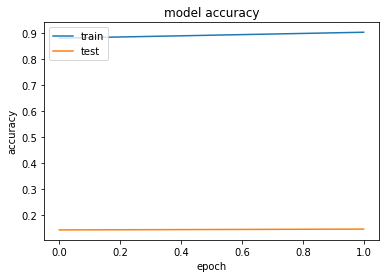

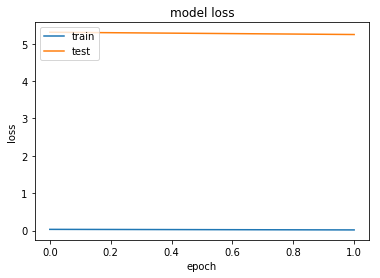

Saved model to disk


In [2]:
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model_json = model.to_json()
with open("model_10h.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_10h.h5")
print("Saved model to disk")

In [6]:
hh = h5py.File('single_dataset_log_16.hdf5', 'r')
d=hh['single_dataset_log_16']
len_data=d.shape
hh.close()
print(len_data)

(7183134, 257)


In [3]:
import h5py 
import tensorflow as tf
hh = h5py.File('ftr_refrmd_10h.hdf5', 'r')
d=hh['ftr_refrmd_10h'][0:500]
data=d
hh.close()
# d=tf.convert_to_tensor(d,tf.float32)
print(type(d[0]))

<class 'numpy.ndarray'>


In [6]:
data[19]

array([-0.08651759,  0.22336993,  0.44741386,  0.92277074,  0.8565611 ,
       -0.21097986,  0.01482241, -0.31860858, -0.69763505, -1.1260797 ,
       -1.3145506 , -1.6120622 , -0.8895558 , -1.2584125 , -0.5357813 ,
       -0.5961562 , -1.5157962 , -1.0339916 , -1.6847466 , -1.2978625 ,
       -1.5814272 , -0.6983488 , -0.72219944, -2.035673  , -0.7506092 ,
       -2.5336158 , -0.52485573, -0.5650042 , -1.1807766 , -0.42296278,
       -0.8960844 , -2.416711  , -1.2472986 , -1.0052608 , -0.85797095,
       -0.62860066, -0.05113654, -0.21714081,  0.0267174 , -0.5353598 ,
       -1.9117582 , -1.4858161 , -1.3420835 , -0.76118916, -0.9266766 ,
       -2.8992896 , -2.095491  , -0.7868872 , -2.2056518 , -0.985487  ,
       -1.4708126 , -2.0216296 , -0.98144644, -1.1434047 , -1.995234  ,
       -1.7717012 , -3.1965823 , -1.4338489 , -1.2426492 , -1.4553313 ,
       -1.7585936 , -1.7883971 , -1.9998507 , -2.7107284 , -2.3896973 ,
       -2.510616  , -2.3158517 , -1.8880926 , -1.8142247 , -1.53

In [9]:
val_y.shape

(13692, 257)

In [37]:
np.savetxt('layers10.txt',layer1[0])
np.savetxt('layers11.txt',layer1[1])
np.savetxt('layers12.txt',layer1[2])
np.savetxt('layers20.txt',layer2[0])
np.savetxt('layers21.txt',layer2[1])
np.savetxt('layers22.txt',layer2[2])
np.savetxt('layers30.txt',layer3[0])
np.savetxt('layers31.txt',layer3[1])
np.savetxt('layers32.txt',layer3[2])
np.savetxt('layers40.txt',layer4[0])
np.savetxt('layers41.txt',layer4[1])
np.savetxt('layers42.txt',layer4[2])


# loadit=np.loadtxt('rbm_layers.txt')
# rbm_layers.dtype

In [43]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
model_weights[m].predict(X_test)

In [2]:
#import libraries.
import matplotlib.pyplot as plt
from tabulate import tabulate
import time
import os
import librosa
from librosa.core import stft, istft
import sounddevice as sd
import time

In [12]:
from RBM import rbm_layer
visible = 7*target.shape[1]
hidden = 2048
visible1 = 2048
hidden1 = 2048
visible2 = 2048
hidden2 = 2048
visible3 = 2048
hidden3 = target.shape[1]
name1='ftr_scaled.hdf5'
name2='ftr_scaled'
layer1 = rbm_layer(visible, hidden, 20, 128, 0.0005, [np.eye(visible)], [np.zeros((1,visible))], 1, target.shape[0], name1, name2)
layer2 = rbm_layer(visible1, hidden1, 20, 128, 0.0005, [np.eye(visible),layer1[0]], [np.zeros((1,visible)),layer1[2]], 2, target.shape[0], name1, name2)
layer3 = rbm_layer(visible2, hidden2, 20, 128, 0.0005, [np.eye(visible),layer1[0],layer2[0]], [np.zeros((1,visible)),layer1[2],layer2[2]], 3, target.shape[0], name1, name2)
layer4 = rbm_layer(visible3, hidden3, 20, 128, 0.0005, [np.eye(visible),layer1[0],layer2[0],layer3[0]], [np.zeros((1,visible)),layer1[2],layer2[2],layer3[2]], 4, target.shape[0], name1, name2)
rbm_layers=[layer1,layer2,layer3,layer4]
h5f = h5py.File('rbm_params.h5', 'w')
h5f.create_dataset('rbm_params', data=rbm_layers)
h5f.close()




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.43it/s]




In [4]:
#define reconstruct function to reconstruct sound from framed signal.
def reconstruct(wave,angle):
    recon = np.sqrt(np.power(10, wave))
    recon1 = recon*np.cos(angle)+recon*np.sin(angle)*1j
    recon = librosa.core.istft((recon1.T), hop_length=200, win_length=500, window='hann')
    return recon

In [29]:
I=0
def da(batch_size, data_len):
    global I
    while True:             #this line is just because keras needs infinite generators
        for I in range(0,data_len-batch_size,batch_size): 
            h5f = h5py.File('ftr_scaled.hdf5','r')
            Data1 = h5f['ftr_scaled'][I:I+batch_size]
            h5f.close()
            h5f = h5py.File('single_dataset_log_16.hdf5','r')
            Data2 = h5f['single_dataset_log_16'][I:I+batch_size]
            h5f.close()
            yield(Data1, Data2)

In [32]:
#training data, which contains 750000 frames.
# X = refr_ftr
# y = target
h = [2048,2048,2048]
#test frames, which is one frame to get spectrograms from.
#another evaluation is doe lated in the code which computes 
#stoi and sdr.
# X_test = refr_ftr[750000:750000+157]
# Y_test = target[750000:750000+157]
# angle = phase[750000:750000+157]


# sparsity_list = []
# zero_nlist = []
# reconlist = []
# Times = []
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
# create model
model = Sequential()
model.add(Dense(h[0], input_dim = 7*target.shape[1], kernel_initializer=tf.constant_initializer(layer1[0]), bias_initializer = tf.constant_initializer(layer1[2])))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(h[1], kernel_initializer=tf.constant_initializer(layer2[0]), bias_initializer = tf.constant_initializer(layer2[2])))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(h[2], kernel_initializer=tf.constant_initializer(layer3[0]), bias_initializer = tf.constant_initializer(layer3[2])))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(target.shape[1], kernel_initializer=tf.constant_initializer(layer4[0]), bias_initializer = tf.constant_initializer(layer4[2])))
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dense(h[0], input_dim = 7*target.shape[1], activation='relu'))
# model.add(Dense(h[1], activation='relu'))
# model.add(Dense(h[2], activation='relu'))
# model.add(Dense(target.shape[1], activation='relu'))
# model.add(Dense(target.shape[1], kernel_initializer='normal'))
# Compile model
adam_opt = optimizers.adam(lr=0.1, decay=0)
model.compile(loss='mean_squared_error', optimizer=adam_opt)
#estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=150, verbose=1)
#kfold = KFold(n_splits=5, random_state=seed)
#results = cross_val_score(estimator, X, y, cv=kfold)
#print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
#estimator.fit(X, y)
batch_size=128
steps = target.shape[0] // batch_size
def lr_scheduler(epoch, lr):
    decay_rate = 0.9
    if epoch>10:
        return lr * decay_rate
    return lr

lr_callbacks = [
    keras.callbacks.LearningRateScheduler(lr_scheduler, verbose=1)
]
model.fit_generator(da(batch_size, target.shape[0]), steps_per_epoch=steps,epochs=50, verbose=1, callbacks = lr_callbacks)
#prediction = model.predict(X_test)
# serialize model to JSON
#write and save model.
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# # serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
# #reconstruct the predicted output from network.
# recon = reconstruct(prediction,angle)
# reconlist.append(recon)
# #get weights from model.
# w0 = estimator.model.get_weights()[0]
# w1 = estimator.model.get_weights()[2]
# w2 = estimator.model.get_weights()[4]
# w=[w0,w1,w2]
# #determine sparsity and number of zero neurons.
# nonzeros = np.nonzero(w[0])[0].shape + np.nonzero(w[1])[0].shape + np.nonzero(w[2])[0].shape 
# sparsity = 1 - np.sum(nonzeros)/(refr_ftr.shape[1]*h[0]+h[0]*h[1]+h[1]*target.shape[1])
# sparsity_list.append(sparsity)
# zero_n = get_zerorows(w)
# zero_nlist.append(zero_n)
# #save and write necessary date.
# np.savetxt('recon.txt',reconlist)
# np.savetxt('sparsity_list.txt',sparsity_list)
# np.savetxt('zero_nlist.txt',zero_nlist)


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.10000000149011612.
7/7 [==============================] - ETA: 2s - loss: 17.01 - 1s 76ms/step - loss: 20.6106
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.10000000149011612.
7/7 [==============================] - ETA: 0s - loss: 16.11 - 0s 8ms/step - loss: 15.3262
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.10000000149011612.
7/7 [==============================] - ETA: 0s - loss: 16.09 - 0s 7ms/step - loss: 15.3232
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.10000000149011612.
7/7 [==============================] - ETA: 0s - loss: 16.09 - 0s 8ms/step - loss: 15.3232
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.10000000149011612.
7/7 [==============================] - ETA: 0s - loss: 16.09 - 0s 8ms/step - loss: 15.3232
Epoch 6/50

Epoch 00006: LearningRateScheduler setting learning rate to 0.10000

In [193]:
#play output voice which is the output of a network with no regularizer.
sd.play(reconlist[0]*10, 16000)
sf.write(('unseen_None.wav'), reconlist[0]*10, 16000)

In [237]:
np.savetxt('runtimes.txt',Times)
Times

[4193.883036136627,
 4849.418083667755,
 4886.912912130356,
 5412.886659860611,
 6004.0426461696625]

In [241]:
#play output voice which is the output of a network with l2 regularizer.
sd.play(reconlist[1]*10, 16000)
sf.write(('unseen_l2.wav'), reconlist[1]*10, 16000)

In [240]:
#play output voice which is the output of a network with l1 regularizer.
sd.play(reconlist[2] *10, 16000)
sf.write(('unseen_l1.wav'), reconlist[2]*10, 16000)

In [238]:
#play output voice which is the output of a network with group regularizer.
sd.play(reconlist[3] *10, 16000)
sf.write(('unseen_group.wav'), reconlist[3]*10, 16000)

In [239]:
#play output voice which is the output of a network with SGL regularizer.
sd.play(reconlist[4] *10, 16000)
sf.write(('unseen_SGL.wav'), reconlist[4]*10, 16000)

In [5]:
from keras.models import model_from_json
json_file = open('model0.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model0.h5")
print("Loaded model from disk")



Using TensorFlow backend.


Loaded model from disk


In [ ]:
recon_clean = reconstruct(Y_test, angle)
recon_mixed = reconstruct(X_test, angle)

In [59]:
#save data.
sf.write('unseen_mixed.wav', recon_mixed, 16000)
sf.write('unseen_clean.wav', recon_clean, 16000)

In [203]:
sd.play(recon_mixed, 16000)

In [211]:
json_file_none = open('model0.json', 'r')
loaded_model_json_none = json_file_none.read()
json_file_none.close()
loaded_model_none = model_from_json(loaded_model_json_none)
# load weights into new model
loaded_model_none.load_weights("model0.h5")
print("Loaded model from disk")

json_file_l2 = open('model1.json', 'r')
loaded_model_json_l2 = json_file_l2.read()
json_file_l2.close()
loaded_model_l2 = model_from_json(loaded_model_json_l2)
# load weights into new model
loaded_model_l2.load_weights("model1.h5")
print("Loaded model from disk")

json_file_l1 = open('model2.json', 'r')
loaded_model_json_l1 = json_file_l1.read()
json_file_l1.close()
loaded_model_l1 = model_from_json(loaded_model_json_l1)
# load weights into new model
loaded_model_l1.load_weights("model2.h5")
print("Loaded model from disk")

json_file_group = open('model3.json', 'r')
loaded_model_json_group = json_file_group.read()
json_file_group.close()
loaded_model_group = model_from_json(loaded_model_json_group)
# load weights into new model
loaded_model_group.load_weights("model3.h5")
print("Loaded model from disk")

json_file_sgl = open('model4.json', 'r')
loaded_model_json_sgl = json_file_sgl.read()
json_file_sgl.close()
loaded_model_sgl = model_from_json(loaded_model_json_sgl)
# load weights into new model
loaded_model_sgl.load_weights("model4.h5")
print("Loaded model from disk")

Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk
Loaded model from disk


In [235]:
model_weights=[loaded_model_none, loaded_model_l2, loaded_model_l1, loaded_model_group, loaded_model_sgl]

In [236]:
#in this part the weights are modified so that if a weight is less than a threshold its zeroed out.
from pystoi.stoi import stoi
model_names=['no reg','l2','l1','group','sgl']
for m in range(len(model_weights)):
    print("results for model "+model_names[m])
    weights = model_weights[m].get_weights()
    sdr_mixed=[]
    sdr=[]
    stoi_mixed=[]
    stoi_eval = []
    zeronr = 0
    for i in range(0,5,2):
        for j in range(len(weights[i])):
            for k in range(len(weights[i][j])):
                if np.abs(weights[i][j][k]) < 1e-5:
                    weights[i][j][k]=0
            temp = np.nonzero(weights[i][j])[0].shape
            if temp == weights[i].shape[1]:
                #if all weights from a neuron are all zero, it means that the neuron is omitted.
                zeronr += 1
    nonzeros = np.nonzero(weights[0])[0].shape + np.nonzero(weights[2])[0].shape + np.nonzero(weights[4])[0].shape 
    sparsity = 1 - np.sum(nonzeros)/(ftr.shape[1]*h[0]+h[0]*h[1]+h[1]*target.shape[1])
    print("sparsity:")
    print(sparsity)
    print("zero neurons:")
    print(zeronr)
    #100 voices are evaluated using SDR and STOI, and its averaged.
    for i in range(800000,800000+100*157,157):
        recon_mixed = reconstruct(X_test,angle)
        recon_clean = reconstruct(Y_test,angle)
        X_test = ftr[i:i+157]
        Y_test = target[i:i+157]
        prediction = model_weights[m].predict(X_test)
        recon = reconstruct(prediction, angle)
        sdr.append(bss_eval_sources(recon_clean, recon, compute_permutation=True)[0][0])
        stoi_eval.append(stoi(recon_clean, recon, 16000, extended=False))
        sdr_mixed.append(bss_eval_sources(recon_clean, recon_mixed, compute_permutation=True)[0][0])
        stoi_mixed.append(stoi(recon_clean, recon_mixed, 16000, extended=False))
    print('prediction stoi: ')
    print(np.mean(np.asarray(stoi_eval)))
    print('mixed stoi: ')
    print(np.mean(np.asarray(stoi_mixed)))
    print('prediction sdr: ')
    print(np.mean(np.asarray(sdr)))
    print('mixed sdr: ')
    print(np.mean(np.asarray(sdr_mixed)))
    print('-------------------------------------------')


results for model no reg
sparsity:
0.00012747813090685511
zero neurons:
0
prediction stoi: 
0.8502018781658421
mixed stoi: 
0.761798788924194
prediction sdr: 
6.369405273040033
mixed sdr: 
3.935131239280896
-------------------------------------------
results for model l2
sparsity:
0.5703635324629655
zero neurons:
0
prediction stoi: 
0.837658878935219
mixed stoi: 
0.761798788924194
prediction sdr: 
6.235915937865186
mixed sdr: 
3.935131239280896
-------------------------------------------
results for model l1
sparsity:
0.051153896874587934
zero neurons:
0
prediction stoi: 
0.7041262565103249
mixed stoi: 
0.761798788924194
prediction sdr: 
1.4882448031481184
mixed sdr: 
3.935131239280896
-------------------------------------------
results for model group
sparsity:
0.6151918765660029
zero neurons:
0
prediction stoi: 
0.7120733166330397
mixed stoi: 
0.761798788924194
prediction sdr: 
1.5681190905828215
mixed sdr: 
3.935131239280896
-------------------------------------------
results for mo

In [97]:
#we can see first layer weights here.
weights_none = loaded_model_none.get_weights()
weights_none[0]

array([[-0.10541639, -0.11203337, -0.2028024 , ..., -0.14105639,
        -0.02640898, -0.26741874],
       [-0.31538433, -0.87092817,  0.15045519, ...,  0.08250466,
         0.21377747,  0.23154591],
       [-0.37044713, -2.1276214 , -0.7767756 , ..., -1.5462991 ,
         0.02828818, -0.40663916],
       ...,
       [ 0.217184  ,  0.3744303 , -0.25406075, ...,  0.30313197,
        -0.10129988, -0.47639948],
       [ 0.37956175,  0.49257466,  0.11651181, ...,  0.40288913,
        -0.05044101,  0.20564316],
       [ 0.30799803,  0.6735903 ,  0.00437123, ...,  0.70599926,
        -0.0634295 ,  0.5263629 ]], dtype=float32)

In [112]:
#we can see first layer weights here.
#before zeroing
weights_l2 = loaded_model_l2.get_weights()
weights_l2[0]

array([[ 2.2748081e-02,  3.6429066e-02,  5.6046619e-33, ...,
        -7.4428597e-34,  2.3167983e-03,  2.2266493e-33],
       [-6.8101035e-03,  4.3759957e-02, -8.9172193e-33, ...,
        -7.2778955e-33, -1.0185386e-01,  2.4851479e-33],
       [ 4.0847931e-02,  5.2484374e-02,  2.1118670e-34, ...,
        -1.0118736e-33, -6.0549568e-02, -5.8096026e-34],
       ...,
       [ 4.0277254e-02, -1.0770088e-02,  3.3916663e-33, ...,
         2.1351273e-33, -2.3281876e-02,  4.1201191e-33],
       [-1.8546725e-02,  8.2013439e-03,  3.4341138e-33, ...,
         2.4918140e-33,  5.2734144e-02,  4.2327105e-33],
       [-7.3502056e-02, -5.4999903e-02,  3.4387225e-33, ...,
         2.3236206e-33,  2.0648794e-02,  4.7854265e-33]], dtype=float32)